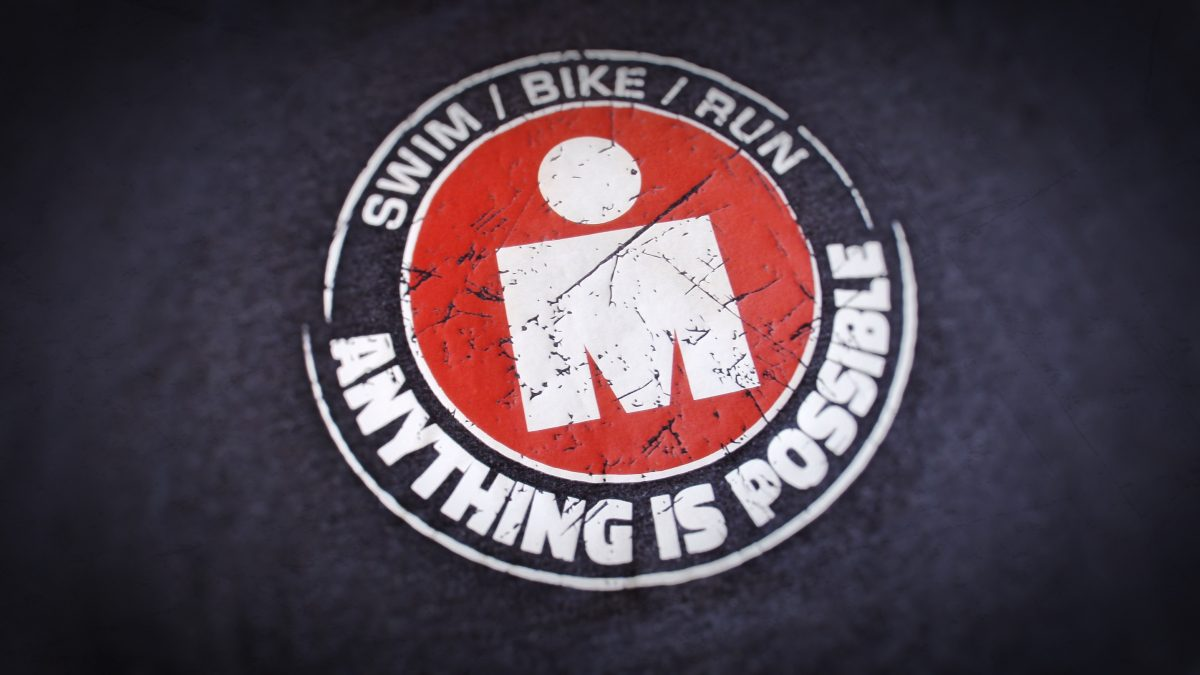

An Ironman Triathlon is one of a series of long-distance triathlon races organized by the World Triathlon Corporation (WTC), consisting of a 3.86 km swim, a 180.25 km bicycle ride and a marathon 42.20 km run, raced in that order. It is widely considered one of the most difficult one-day sporting events in the world.

Jan Frodeno (born 18 August 1981) is a German triathlete. He is 3-time winner of the Ironman World Championship in 2015, 2016, and 2019.

This Notebook is a review of Jan Frodeno's results from 2015. and 2019. Ironman World Championship.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import numpy
import csv
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib import style
from scipy import stats
from scipy.special import ndtri
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraph

In [2]:
jf_15 = pd.read_csv(r'C:\Users\bokec\Data Science\Jan Frodeno\project\pcsv\2015i.csv', encoding = 'latin_1')
jf_15

,Discipline_id,Discipline_15,Segment_name_15,Segment_15/km,Tot_lenght_15/km,Total_time_15,Segment_time_15,Speed_15/km/h,Comp_to_AG_15,Temperature_15/°C
0,1,Swim_tot,NaN,3.8,3.8,10/10/2015 0:50,10/10/2015 0:50,4.6,-3.40,NaN
1,2,Transition_1,NaN,NaN,3.8,10/10/2015 0:52,10/10/2015 0:01,NaN,-0.30,NaN
2,3,NaN,Bike,8.0,11.8,10/10/2015 1:05,10/10/2015 0:12,38.3,0.00,26.1
3,4,NaN,Bike,12.6,16.4,10/10/2015 1:09,10/10/2015 0:04,64.9,0.00,26.1
4,5,NaN,Bike,18.3,22.1,10/10/2015 1:18,10/10/2015 0:08,40.0,0.00,26.1
5,6,NaN,Bike,50.7,54.5,10/10/2015 2:03,10/10/2015 0:45,42.4,0.00,26.1
6,7,NaN,Bike,70.2,74.0,10/10/2015 2:34,10/10/2015 0:31,37.6,-0.80,26.1
7,8,NaN,Bike,96.9,100.7,10/10/2015 3:17,10/10/2015 0:42,37.5,-2.00,30.0
8,9,NaN,Bike,123.4,127.2,10/10/2015 3:52,10/10/2015 0:35,45.5,-1.30,30.0
9,10,NaN,Bike,142.9,146.7,10/10/2015 4:20,10/10/2015 0:27,41.9,-2.40,30.5


In [3]:
discipline15 = jf_15.groupby(['Discipline_15','Segment_time_15'])['Segment_15/km'].sum().reset_index()
discipline15

,Discipline_15,Segment_time_15,Segment_15/km
0,Bike_tot,10/10/2015 4:27,180.2
1,Run_tot,10/10/2015 2:52,42.2
2,Swim_tot,10/10/2015 0:50,3.8
3,Total,10/10/2015 8:14,226.2
4,Transition_1,10/10/2015 0:01,0.0
5,Transition_2,10/10/2015 0:02,0.0


In [4]:
jf_19 = pd.read_csv(r'C:\Users\bokec\Data Science\Jan Frodeno\project\pcsv\2019i.csv', header = 1, encoding = 'latin_1')
jf_19

,Discipline_id,Discipline_19,Segment_name_19,Segment_19/km,Tot_lenght_19/km,Total_time_19,Segment_time_19,Speed_19/km/h,Temperature_19/°C
0,1,Swim_tot,NaN,3.9,3.9,10/12/2019 0:47,10/12/2019 0:47,4.90,NaN
1,2,Transition_1,NaN,NaN,3.9,10/12/2019 0:49,10/12/2019 0:01,NaN,NaN
2,3,NaN,Bike,3.5,7.4,10/12/2019 0:55,10/12/2019 0:06,34.90,25.0
3,4,NaN,Bike,7.5,11.4,10/12/2019 1:01,10/12/2019 0:06,37.00,25.0
4,5,NaN,Bike,14.1,18.0,10/12/2019 1:10,10/12/2019 0:08,47.40,25.0
5,6,NaN,Bike,23.7,27.6,10/12/2019 1:23,10/12/2019 0:13,43.50,25.0
6,7,NaN,Bike,37.6,41.5,10/12/2019 1:43,10/12/2019 0:19,42.70,25.0
7,8,NaN,Bike,50.4,54.3,10/12/2019 1:59,10/12/2019 0:16,45.60,25.0
8,9,NaN,Bike,67.5,71.4,10/12/2019 2:24,10/12/2019 0:24,41.30,26.1
9,10,NaN,Bike,80.5,84.4,10/12/2019 2:42,10/12/2019 0:17,43.60,26.1


In [5]:
discipline19 = jf_19.groupby(['Discipline_19', 'Segment_time_19'])['Segment_19/km'].sum().reset_index()
discipline19



,Discipline_19,Segment_time_19,Segment_19/km
0,Bike_tot,10/12/2019 4:16,181.2
1,Run_tot,10/12/2019 2:42,42.7
2,Swim_tot,10/12/2019 0:47,3.9
3,Total,10/12/2019 7:51,227.8
4,Transition_1,10/12/2019 0:01,0.0
5,Transition_2,10/12/2019 0:02,0.0


1. Comparison of the segment time and segment lenght (2015. and 2019.)

A) Data cleaning and preparing - file 2015.

In [6]:
time15= discipline15.groupby('Segment_time_15')['Segment_15/km'].sum().reset_index()
time15

,Segment_time_15,Segment_15/km
0,10/10/2015 0:01,0.0
1,10/10/2015 0:02,0.0
2,10/10/2015 0:50,3.8
3,10/10/2015 2:52,42.2
4,10/10/2015 4:27,180.2
5,10/10/2015 8:14,226.2


In [7]:
cat15 = time15['Segment_time_15']
cat15

0    10/10/2015 0:01
1    10/10/2015 0:02
2    10/10/2015 0:50
3    10/10/2015 2:52
4    10/10/2015 4:27
5    10/10/2015 8:14
Name: Segment_time_15, dtype: object

In [8]:
sort_cat15 = cat15.sort_values(ascending=True)
sort_cat15

0    10/10/2015 0:01
1    10/10/2015 0:02
2    10/10/2015 0:50
3    10/10/2015 2:52
4    10/10/2015 4:27
5    10/10/2015 8:14
Name: Segment_time_15, dtype: object

In [9]:
time_cat15 = pd.to_datetime(sort_cat15, format= '%m/%d/%Y %H:%M')
time_cat15

0   2015-10-10 00:01:00
1   2015-10-10 00:02:00
2   2015-10-10 00:50:00
3   2015-10-10 02:52:00
4   2015-10-10 04:27:00
5   2015-10-10 08:14:00
Name: Segment_time_15, dtype: datetime64[ns]

In [10]:
len15 = time15['Segment_15/km']
len15

0      0.0
1      0.0
2      3.8
3     42.2
4    180.2
5    226.2
Name: Segment_15/km, dtype: float64

In [11]:
sort_len15 = len15.sort_values(ascending=True)
sort_len15

0      0.0
1      0.0
2      3.8
3     42.2
4    180.2
5    226.2
Name: Segment_15/km, dtype: float64

B) Data cleaning and preparing - file 2019.

In [12]:
time19 = discipline19.groupby('Segment_time_19')['Segment_19/km'].sum().reset_index()
time19

,Segment_time_19,Segment_19/km
0,10/12/2019 0:01,0.0
1,10/12/2019 0:02,0.0
2,10/12/2019 0:47,3.9
3,10/12/2019 2:42,42.7
4,10/12/2019 4:16,181.2
5,10/12/2019 7:51,227.8


In [13]:
cat19 = time19['Segment_time_19']
cat19

0    10/12/2019 0:01
1    10/12/2019 0:02
2    10/12/2019 0:47
3    10/12/2019 2:42
4    10/12/2019 4:16
5    10/12/2019 7:51
Name: Segment_time_19, dtype: object

In [14]:
sort_cat19 = cat19.sort_values(ascending=True)
sort_cat19

0    10/12/2019 0:01
1    10/12/2019 0:02
2    10/12/2019 0:47
3    10/12/2019 2:42
4    10/12/2019 4:16
5    10/12/2019 7:51
Name: Segment_time_19, dtype: object

In [15]:
time_cat19 = pd.to_datetime(sort_cat19, format = '%m/%d/%Y %H:%M')
time_cat19

0   2019-10-12 00:01:00
1   2019-10-12 00:02:00
2   2019-10-12 00:47:00
3   2019-10-12 02:42:00
4   2019-10-12 04:16:00
5   2019-10-12 07:51:00
Name: Segment_time_19, dtype: datetime64[ns]

In [16]:
len19 = time19['Segment_19/km']
len19

0      0.0
1      0.0
2      3.9
3     42.7
4    181.2
5    227.8
Name: Segment_19/km, dtype: float64

In [17]:
sort_len19 = len19.sort_values(ascending=True)
sort_len19

0      0.0
1      0.0
2      3.9
3     42.7
4    181.2
5    227.8
Name: Segment_19/km, dtype: float64

c) Data visualization

<function matplotlib.pyplot.show(*args, **kw)>

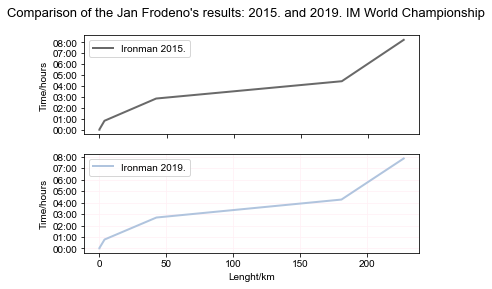

In [18]:
fig, axs = plt.subplots(2)
fig.suptitle("Comparison of the Jan Frodeno's results: 2015. and 2019. IM World Championship", fontsize=13)

#2015:
axs[0].plot(sort_len15, time_cat15, label = 'Ironman 2015.', color = 'dimgray', linewidth=2)
axs[0].yaxis.set_major_locator(mdates.HourLocator(byhour=range(0,11,1)))
axs[0].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].legend()


#2019:
axs[1].plot(sort_len19, time_cat19,label = 'Ironman 2019.', color = 'lightsteelblue', linewidth=2)
axs[1].yaxis.set_major_locator(mdates.HourLocator(byhour=range(0,9,1)))
axs[1].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].legend()

for ax in axs.flat:
    ax.set(xlabel='Lenght/km', ylabel='Time/hours')

for ax in axs.flat:
    ax.label_outer()



style.use('seaborn')
plt.grid(True, color ='lavenderblush' )
plt.show




2. Averege speed throughout each discipline (2015. and 2019.)

A) Data cleaning and preparing - file 2015.

In [19]:
speed15 = jf_15.groupby('Discipline_15')['Speed_15/km/h'].sum().reset_index()
speed15

,Discipline_15,Speed_15/km/h
0,Bike_tot,40.4
1,Run_tot,14.6
2,Swim_tot,4.6
3,Total,27.5
4,Transition_1,0.0
5,Transition_2,0.0


In [20]:
sort_speed15 = speed15.sort_values('Speed_15/km/h', ascending=True)
sort_speed15

,Discipline_15,Speed_15/km/h
4,Transition_1,0.0
5,Transition_2,0.0
2,Swim_tot,4.6
1,Run_tot,14.6
3,Total,27.5
0,Bike_tot,40.4


In [21]:
disc15 = sort_speed15['Discipline_15']
disc15

4    Transition_1
5    Transition_2
2        Swim_tot
1         Run_tot
3           Total
0        Bike_tot
Name: Discipline_15, dtype: object

In [22]:
avg_speed15 = sort_speed15['Speed_15/km/h']
avg_speed15

4     0.0
5     0.0
2     4.6
1    14.6
3    27.5
0    40.4
Name: Speed_15/km/h, dtype: float64

B) Data cleaning and preparing - file 2019.

In [23]:
speed19 = jf_19.groupby('Discipline_19')['Speed_19/km/h'].sum().reset_index()
speed19

,Discipline_19,Speed_19/km/h
0,Bike_tot,42.50
1,Run_tot,15.80
2,Swim_tot,4.90
3,Total,29.01
4,Transition_1,0.00
5,Transition_2,0.00


In [24]:
sort_speed19 = speed19.sort_values('Speed_19/km/h', ascending=True)
sort_speed19

,Discipline_19,Speed_19/km/h
4,Transition_1,0.00
5,Transition_2,0.00
2,Swim_tot,4.90
1,Run_tot,15.80
3,Total,29.01
0,Bike_tot,42.50


In [25]:
disc19 = sort_speed19['Discipline_19']
disc19

4    Transition_1
5    Transition_2
2        Swim_tot
1         Run_tot
3           Total
0        Bike_tot
Name: Discipline_19, dtype: object

In [26]:
avg_speed19 =sort_speed19['Speed_19/km/h']
avg_speed19

4     0.00
5     0.00
2     4.90
1    15.80
3    29.01
0    42.50
Name: Speed_19/km/h, dtype: float64

c) Data visualization

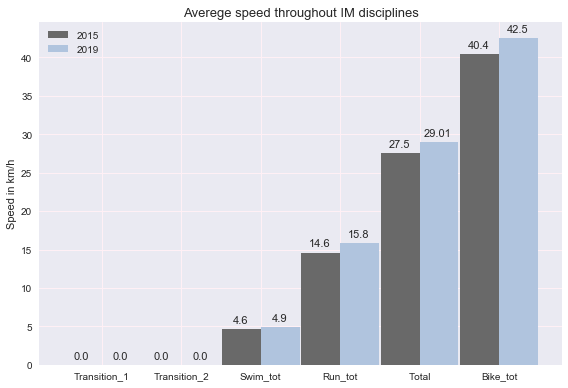

In [27]:
fig, ax = plt.subplots()
width = 0.49
x = np.arange(len(disc15))

visual15 = ax.bar(x-width/2, avg_speed15, width, label='2015', color='dimgray')
visual19 = ax.bar(x+width/2, avg_speed19, width, label='2019', color='lightsteelblue')


ax.set_ylabel('Speed in km/h')
ax.set_title('Averege speed throughout IM disciplines', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(disc15)
ax.legend()

def myfunction (visuals, xpos='center'):
    for visual in visuals:
        height = visual.get_height()
        xbar = visual.get_x() + visual.get_width()/2
        ax.annotate('{}'.format(height),
                   xy=(xbar, height),
                   xytext = (-1,4),
                   textcoords='offset points',
                   horizontalalignment='center', 
                    verticalalignment='bottom', fontsize=11)

myfunction(visual15, 'left')
myfunction(visual19, 'right')

fig.tight_layout()
plt.grid(True, color ='lavenderblush' )
plt.show()
    

3.) Time difference between averege time of all athletes from Male Professional athletes (MPRO) and Jan Frodeno's time throughout bike distance (2015.)

A) Data cleaning and preparing

In [28]:
comp_avg15= jf_15.groupby(['Segment_name_15', 'Segment_15/km'])['Comp_to_AG_15'].sum().reset_index()
comp_avg15.head()

,Segment_name_15,Segment_15/km,Comp_to_AG_15
0,Bike,8.0,0.0
1,Bike,12.6,0.0
2,Bike,18.3,0.0
3,Bike,50.7,0.0
4,Bike,70.2,-0.8


In [29]:
bike15 = comp_avg15.loc[comp_avg15['Segment_name_15']== 'Bike']
bike15

,Segment_name_15,Segment_15/km,Comp_to_AG_15
0,Bike,8.0,0.0
1,Bike,12.6,0.0
2,Bike,18.3,0.0
3,Bike,50.7,0.0
4,Bike,70.2,-0.8
5,Bike,96.9,-2.0
6,Bike,123.4,-1.3
7,Bike,142.9,-2.4
8,Bike,175.4,-4.6
9,Bike,180.2,-0.9


In [30]:
bike15_gr= bike15.groupby('Segment_15/km')['Comp_to_AG_15'].sum().reset_index()
bike15_gr.head()

,Segment_15/km,Comp_to_AG_15
0,8.0,0.0
1,12.6,0.0
2,18.3,0.0
3,50.7,0.0
4,70.2,-0.8


In [31]:
sort_group15 = bike15_gr.sort_values('Segment_15/km', ascending=True)
sort_group15 


,Segment_15/km,Comp_to_AG_15
0,8.0,0.0
1,12.6,0.0
2,18.3,0.0
3,50.7,0.0
4,70.2,-0.8
5,96.9,-2.0
6,123.4,-1.3
7,142.9,-2.4
8,175.4,-4.6
9,180.2,-0.9


In [32]:
slen15 = sort_group15['Segment_15/km']
slen15

0      8.0
1     12.6
2     18.3
3     50.7
4     70.2
5     96.9
6    123.4
7    142.9
8    175.4
9    180.2
Name: Segment_15/km, dtype: float64

In [33]:
savg15 = sort_group15['Comp_to_AG_15']
savg15

0    0.0
1    0.0
2    0.0
3    0.0
4   -0.8
5   -2.0
6   -1.3
7   -2.4
8   -4.6
9   -0.9
Name: Comp_to_AG_15, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

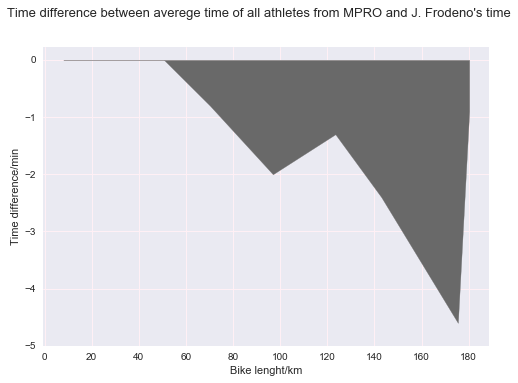

In [34]:
fig, ax = plt.subplots()
fig.suptitle("Time difference between averege time of all athletes from MPRO and J. Frodeno's time", fontsize=13)

ax.fill_between(slen15, 0, savg15, color='dimgray')

ax.set(xlabel='Bike lenght/km', ylabel='Time difference/min')


ax.set_xticks(np.arange(0,200, 20))
ax.set_yticks(np.arange(-5,1,1))



style.use('seaborn')
plt.grid(True, color ='lavenderblush' )

plt.show

4.) Relation between weather condition (daily temperature) and J.Frodenos's speed in run and bike disciplines

 2015.

A) Data cleaning and preparing

In [35]:
temp15 = jf_15.groupby(['Segment_name_15', 'Speed_15/km/h'])['Temperature_15/°C'].sum().reset_index()
temp15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C
0,Bike,29.1,31.1
1,Bike,37.5,30.0
2,Bike,37.6,26.1
3,Bike,38.3,26.1
4,Bike,39.4,31.1


In [36]:
sort_ts15= temp15.sort_values('Speed_15/km/h', ascending=True)
sort_ts15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C
10,Run,12.7,31.6
11,Run,13.6,30.5
12,Run,13.9,92.1
13,Run,14.3,31.6
14,Run,14.6,31.1


In [37]:
speed15 = sort_ts15['Speed_15/km/h']
speed15.head()

10    12.7
11    13.6
12    13.9
13    14.3
14    14.6
Name: Speed_15/km/h, dtype: float64

In [38]:
sort_speed15 = speed15.sort_values(ascending=True)
sort_speed15.head()

10    12.7
11    13.6
12    13.9
13    14.3
14    14.6
Name: Speed_15/km/h, dtype: float64

B) Is there normal distribution?

Histogram

In [39]:
std1 = sort_speed15.std()
std1

15.394465731664699

In [40]:
mean1 = sort_speed15.mean()
mean1

29.638888888888882

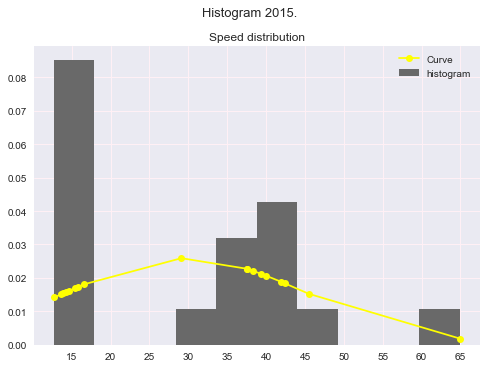

In [41]:
fig, ax = plt.subplots()
fig.suptitle('Histogram 2015.', fontsize=13)

fit = stats.norm.pdf(sort_speed15,mean1, std1)

ax.set_xticks(np.arange(0,80, 5))
ax.set_title('Speed distribution')

ax.plot(speed15, fit, '-o', label='Curve', color = 'yellow')
ax.hist(speed15, density=True, label='histogram',color = 'dimgray')
ax.legend()

style.use('seaborn')
plt.grid(True, color ='lavenderblush' )
plt.show()

In [42]:
#Shapiro-Wilk test
x = stats.norm.rvs(loc=27.519048, scale=15.165573, size=21)
stats.shapiro(x)

(0.9681920409202576, 0.692771315574646)

C) Box Plot

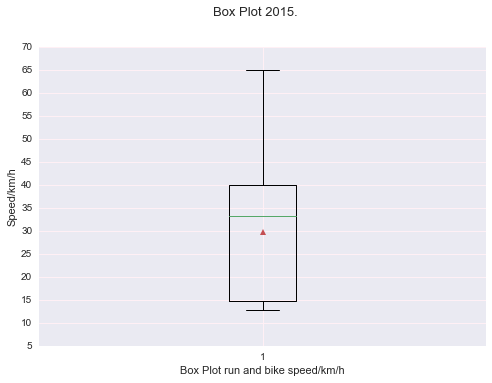

In [43]:
fig, ax = plt.subplots()
fig.suptitle('Box Plot 2015.', fontsize=13)

ax.boxplot(sort_speed15, showmeans=True )

ax.set_yticks(np.arange(5,75,5))
ax.set_ylabel('Speed/km/h')
ax.set_xlabel('Box Plot run and bike speed/km/h')

style.use('seaborn')
plt.grid(True, color ='lavenderblush' )
plt.show()



D) Quantile-quantile (QQ) plot

In [44]:
sort_ts15['count15']= sort_ts15.index+1
sort_ts15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C,count15
10,Run,12.7,31.6,11
11,Run,13.6,30.5,12
12,Run,13.9,92.1,13
13,Run,14.3,31.6,14
14,Run,14.6,31.1,15


In [45]:
n_rows15 = sort_ts15.shape[0]
n_rows15

18

In [46]:
sort_ts15['percentile_area15']=(sort_ts15['count15'])/n_rows15
sort_ts15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C,count15,percentile_area15
10,Run,12.7,31.6,11,0.611111
11,Run,13.6,30.5,12,0.666667
12,Run,13.9,92.1,13,0.722222
13,Run,14.3,31.6,14,0.777778
14,Run,14.6,31.1,15,0.833333


In [47]:
#calculate theoritical z value from percentile area:
sort_ts15['z_theoretical15']= ndtri(sort_ts15['percentile_area15'])
sort_ts15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C,count15,percentile_area15,z_theoretical15
10,Run,12.7,31.6,11,0.611111,0.282216
11,Run,13.6,30.5,12,0.666667,0.430727
12,Run,13.9,92.1,13,0.722222,0.589456
13,Run,14.3,31.6,14,0.777778,0.764710
14,Run,14.6,31.1,15,0.833333,0.967422


In [48]:
sort_ts15.describe()

,Speed_15/km/h,Temperature_15/°C,count15,percentile_area15,z_theoretical15
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,29.638889,34.661111,9.500000,0.527778,inf
std,15.394466,16.362839,5.338539,0.296586,NaN
min,12.700000,26.100000,1.000000,0.055556,-1.593219
25%,14.800000,27.075000,5.250000,0.291667,-0.549774
50%,33.300000,30.800000,9.500000,0.527778,0.069855
75%,39.850000,31.100000,13.750000,0.763889,0.720896
max,64.900000,92.100000,18.000000,1.000000,inf


In [49]:
#calculate actual z value from sort_ts15['Speed_15/km/h'] - mean/sd:
sort_ts15['z_actual_speed15']= (sort_ts15['Speed_15/km/h'] - 27.519048)/15.165573
sort_ts15.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C,count15,percentile_area15,z_theoretical15,z_actual_speed15
10,Run,12.7,31.6,11,0.611111,0.282216,-0.977151
11,Run,13.6,30.5,12,0.666667,0.430727,-0.917806
12,Run,13.9,92.1,13,0.722222,0.589456,-0.898024
13,Run,14.3,31.6,14,0.777778,0.764710,-0.871648
14,Run,14.6,31.1,15,0.833333,0.967422,-0.851867


In [50]:
sort_z1 = sort_ts15.sort_values('Speed_15/km/h', ascending=True)
sort_z1.head()

,Segment_name_15,Speed_15/km/h,Temperature_15/°C,count15,percentile_area15,z_theoretical15,z_actual_speed15
10,Run,12.7,31.6,11,0.611111,0.282216,-0.977151
11,Run,13.6,30.5,12,0.666667,0.430727,-0.917806
12,Run,13.9,92.1,13,0.722222,0.589456,-0.898024
13,Run,14.3,31.6,14,0.777778,0.764710,-0.871648
14,Run,14.6,31.1,15,0.833333,0.967422,-0.851867


In [51]:
sort_za1 = sort_z1['z_actual_speed15']
sort_za1.head()

10   -0.977151
11   -0.917806
12   -0.898024
13   -0.871648
14   -0.851867
Name: z_actual_speed15, dtype: float64

In [52]:
sort_zt1 = sort_z1['z_theoretical15']
sort_zt1.head()

10    0.282216
11    0.430727
12    0.589456
13    0.764710
14    0.967422
Name: z_theoretical15, dtype: float64

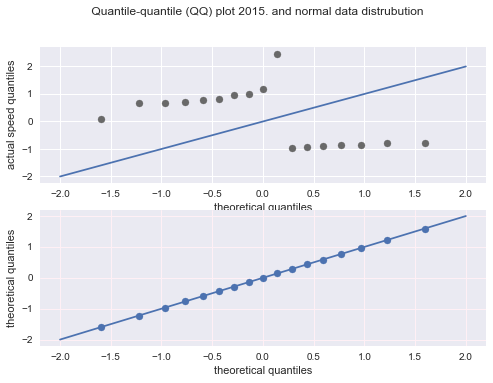

In [53]:
#plot scatter plot/ Quantile-quantile (QQ) plot
fig, axs = plt.subplots(2)
fig.suptitle(' Quantile-quantile (QQ) plot 2015. and normal data distrubution')

axs[0].scatter(sort_zt1,sort_za1,color = 'dimgray' )
axs[0].plot([-2,-1,0,1,2], [-2,-1,0,1,2])


axs[0].set(xlabel='theoretical quantiles', ylabel= 'actual speed quantiles')

#scatter plot with theoretical z values:

axs[1].scatter(sort_zt1,sort_zt1 )
axs[1].plot([-2,-1,0,1,2], [-2,-1,0,1,2])

axs[1].set(xlabel='theoretical quantiles', ylabel='theoretical quantiles')


plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')


In [54]:
#Shapiro-Wilk test
mean = sort_za1.mean()
std = sort_za1.std()
x = stats.norm.rvs(loc=mean, scale=std, size=21)
stats.shapiro(x)

(0.9709747433662415, 0.7545260787010193)

In [55]:
#qq plot for temp
temp15 = sort_z1.groupby(['Segment_name_15','z_actual_speed15', 'z_theoretical15'])['Temperature_15/°C'].sum().reset_index()
temp15.head()

,Segment_name_15,z_actual_speed15,z_theoretical15,Temperature_15/°C
0,Bike,0.104246,-1.593219,31.1
1,Bike,0.658132,-1.220640,30.0
2,Bike,0.664726,-0.967422,26.1
3,Bike,0.710883,-0.764710,26.1
4,Bike,0.783416,-0.589456,31.1


In [56]:
sort_t15 = temp15.sort_values('Temperature_15/°C', ascending=True)
sort_t15.head()

,Segment_name_15,z_actual_speed15,z_theoretical15,Temperature_15/°C
2,Bike,0.664726,-0.967422,26.1
3,Bike,0.710883,-0.764710,26.1
5,Bike,0.822979,-0.430727,26.1
7,Bike,0.981232,-0.139710,26.1
9,Bike,2.464856,0.139710,26.1


In [57]:
sort_t15['z_actual_temp15']= (sort_t15['Temperature_15/°C'] - 29.709524)/2.110901
sort_t15.head()

,Segment_name_15,z_actual_speed15,z_theoretical15,Temperature_15/°C,z_actual_temp15
2,Bike,0.664726,-0.967422,26.1,-1.709945
3,Bike,0.710883,-0.764710,26.1,-1.709945
5,Bike,0.822979,-0.430727,26.1,-1.709945
7,Bike,0.981232,-0.139710,26.1,-1.709945
9,Bike,2.464856,0.139710,26.1,-1.709945


In [58]:
sort_t15.sort_values('z_actual_temp15', ascending=True).head()

,Segment_name_15,z_actual_speed15,z_theoretical15,Temperature_15/°C,z_actual_temp15
2,Bike,0.664726,-0.967422,26.1,-1.709945
3,Bike,0.710883,-0.764710,26.1,-1.709945
5,Bike,0.822979,-0.430727,26.1,-1.709945
7,Bike,0.981232,-0.139710,26.1,-1.709945
9,Bike,2.464856,0.139710,26.1,-1.709945


In [59]:
sort_zt15 = sort_t15['z_theoretical15']


In [60]:
sort_zat15 = sort_t15['z_actual_temp15']
sort_zat15

2     -1.709945
3     -1.709945
5     -1.709945
7     -1.709945
9     -1.709945
8      0.137608
1      0.137608
6      0.374473
11     0.374473
15     0.658712
14     0.658712
0      0.658712
16     0.658712
4      0.658712
13     0.895578
10     0.895578
17    15.107519
12    29.556325
Name: z_actual_temp15, dtype: float64

In [61]:
sort_zas15 = sort_t15['z_actual_speed15']
sort_zas15.head()

2    0.664726
3    0.710883
5    0.822979
7    0.981232
9    2.464856
Name: z_actual_speed15, dtype: float64

In [62]:
sort_zas151 = sort_t15.sort_values(by=['z_actual_temp15'])
sort_zas152= sort_zas151['z_actual_speed15']
sort_zas152.head()

2    0.664726
3    0.710883
5    0.822979
7    0.981232
9    2.464856
Name: z_actual_speed15, dtype: float64

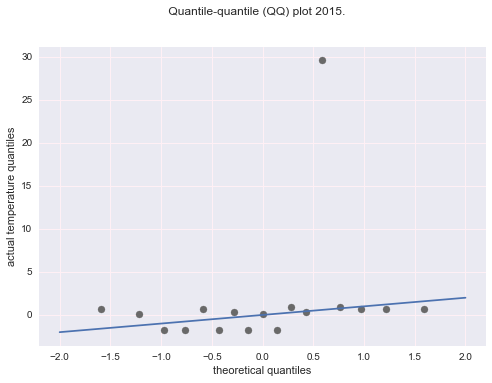

In [63]:
#plot scatter plot/ Quantile-quantile (QQ) plot
fig, ax = plt.subplots()
fig.suptitle(' Quantile-quantile (QQ) plot 2015.')

ax.scatter(sort_zt15,sort_zat15,color = 'dimgray' )
ax.plot([-2,-1,0,1,2], [-2,-1,0,1,2])


ax.set(xlabel='theoretical quantiles' , ylabel='actual temperature quantiles')

plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')


E) Standardization of a Scatter Plot

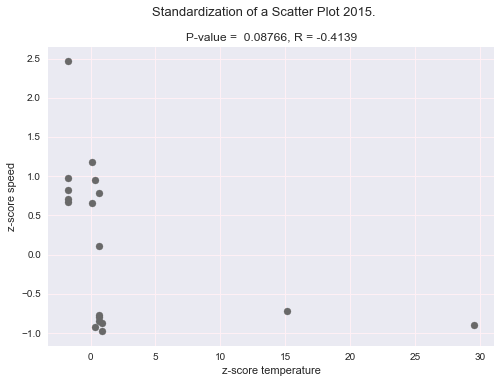

In [64]:
#(zx, zy)= (z_actual_temp,z_actual_speed)

fig, ax = plt.subplots()
fig.suptitle('Standardization of a Scatter Plot 2015.', fontsize=13)
ax.scatter(sort_zat15, sort_zas152, color= 'dimgray')


ax.set(xlabel='z-score temperature', ylabel='z-score speed')
ax.set_title('P-value =  0.08766, R = -0.4139')
plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')

In [65]:
stats.pearsonr(sort_zat15, sort_zas152)

(-0.4139767603804234, 0.087660394283179)

F) Performing Linear Regression on standardized scores

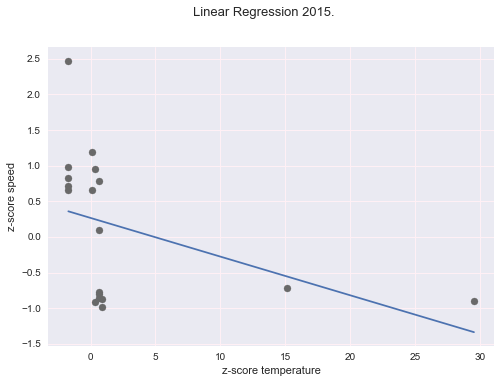

In [66]:
x15 = sort_zat15.values.reshape(-1,1)
y15 = sort_zas152.values.reshape(-1,1)
lr15 = LinearRegression()
lr15.fit(x15, y15)
y15_pred = lr15.predict(x15)
    
fig, ax = plt.subplots()
fig.suptitle('Linear Regression 2015.', fontsize=13)
ax.scatter(x15, y15, color= 'dimgray')
ax.plot(x15,y15_pred )

ax.set(xlabel='z-score temperature', ylabel='z-score speed')

plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')

G)Identifying the outliers

In [67]:
x15 = sort_zat15.values.reshape(-1,1)
x15

array([[-1.70994471],
       [-1.70994471],
       [-1.70994471],
       [-1.70994471],
       [-1.70994471],
       [ 0.13760759],
       [ 0.13760759],
       [ 0.37447327],
       [ 0.37447327],
       [ 0.65871209],
       [ 0.65871209],
       [ 0.65871209],
       [ 0.65871209],
       [ 0.65871209],
       [ 0.89557777],
       [ 0.89557777],
       [15.10751854],
       [29.556325  ]])

In [68]:
y15 = sort_zas152.values.reshape(-1,1)
y15

array([[ 0.66472609],
       [ 0.71088326],
       [ 0.82297926],
       [ 0.98123243],
       [ 2.46485589],
       [ 1.18564277],
       [ 0.65813221],
       [-0.91780561],
       [ 0.94826302],
       [-0.79911573],
       [-0.85186679],
       [ 0.10424611],
       [-0.77274021],
       [ 0.78341596],
       [-0.87164844],
       [-0.97715055],
       [-0.71998915],
       [-0.89802397]])

In [69]:
x15,y15
#add outlier:
x15[6]=3
y15[6]=10

In [70]:
#make fit:
regression15 = smapi.ols("data ~ x15", data=dict(data=y15, x=x15)).fit()
regression15.summary()


C:\Users\bokec\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.3562
Date:                Mon, 10 Feb 2020   Prob (F-statistic):              0.559
Time:                        17:55:39   Log-Likelihood:                -41.603
No. Observations:                  18   AIC:                             87.21
Df Residuals:                      16   BIC:                             88.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7802      0.643      1.213      0.243      -0.583       2.144
x15           -0.0485      0.081     -0.597      0.559      -0.221       0.124
==============================================================================
Omnibus:                       37.065   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.325
Skew:                           3.055   Prob(JB):                     2.43e-20
Kurtosis:                      12.116   Cond. No.                         8.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
test15 = regression15.outlier_test(method='bonf', alpha=0.05)
test15

,student_resid,unadj_p,bonf(p)
0,-0.077046,9.396054e-01,1.000000
1,-0.059107,9.536468e-01,1.000000
2,-0.015556,9.877934e-01,1.000000
3,0.045921,9.639787e-01,1.000000
4,0.630430,5.379003e-01,1.000000
5,0.159215,8.756237e-01,1.000000
6,9.855245,6.051573e-08,0.000001
7,-0.657268,5.209673e-01,1.000000
8,0.071861,9.436620e-01,1.000000
9,-0.603756,5.550276e-01,1.000000


In [72]:
outliers15 = ((x15[i], y15[i]) for i, t in enumerate(test15['bonf(p)']) if t<0.05)
print('Outliers: ', list(outliers15))

Outliers:  [(array([3.]), array([10.]))]


In [73]:
test15[test15['bonf(p)']<0.05]

,student_resid,unadj_p,bonf(p)
6,9.855245,6.051573e-08,0.000001


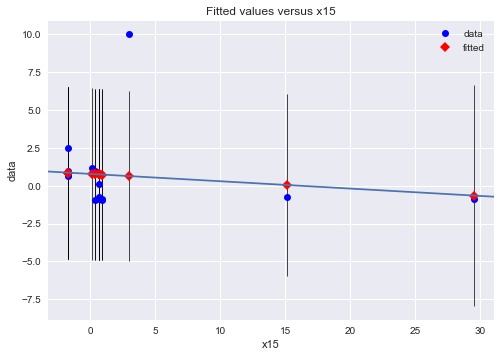

In [74]:
figure15 = smgraph.regressionplots.plot_fit(regression15, 1)
line15 = smgraph.regressionplots.abline_plot(model_results=regression15, ax=figure15.axes[0])


2019.

A) Data cleaning and preparing

In [75]:
temp19 = jf_19.groupby(['Segment_name_19', 'Speed_19/km/h'])['Temperature_19/°C'].sum().reset_index()
temp19.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C
0,Bike,34.9,25.0
1,Bike,35.8,26.6
2,Bike,37.0,25.0
3,Bike,38.7,27.7
4,Bike,40.3,27.7


In [76]:
sort_ts19= temp19.sort_values('Speed_19/km/h', ascending=True)
sort_ts19.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C
15,Run,14.7,29.4
16,Run,14.8,30.0
17,Run,15.3,59.4
18,Run,15.5,60.0
19,Run,15.6,88.8


In [77]:
sort_ts19.describe()

,Speed_19/km/h,Temperature_19/°C
count,30.000000,30.000000
mean,29.540000,36.590000
std,13.496401,20.022132
min,14.700000,25.000000
25%,16.175000,26.225000
50%,27.300000,28.800000
75%,42.500000,29.400000
max,51.700000,88.800000


In [78]:
speed19 = sort_ts19['Speed_19/km/h']
speed19.head()

15    14.7
16    14.8
17    15.3
18    15.5
19    15.6
Name: Speed_19/km/h, dtype: float64

In [79]:
sort_speed19 = speed19.sort_values(ascending=True)
sort_speed19.head()

15    14.7
16    14.8
17    15.3
18    15.5
19    15.6
Name: Speed_19/km/h, dtype: float64

In [80]:
sort_speed19.size

30

B) Histogram

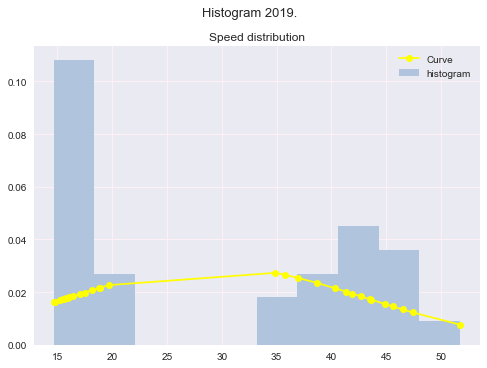

In [81]:
fig, ax = plt.subplots()
fig.suptitle('Histogram 2019.', fontsize=13)

h = sort_speed19
fit = stats.norm.pdf(h, 29.540000, 13.496401)

ax.set_xticks(np.arange(0,80, 5))
ax.set_title('Speed distribution')

ax.plot(sort_speed19, fit, '-o', label='Curve', color = 'yellow')
ax.hist(sort_speed19, density=True, label='histogram',color = 'lightsteelblue' )
ax.legend()

style.use('seaborn')
plt.grid(True, color ='lavenderblush' )
plt.show()

In [82]:
#Shapiro-Wilk test
x19 = stats.norm.rvs(loc=29.540000, scale=13.496401, size=30)
stats.shapiro(x19)

(0.9693466424942017, 0.5214555263519287)

C) Box Plot

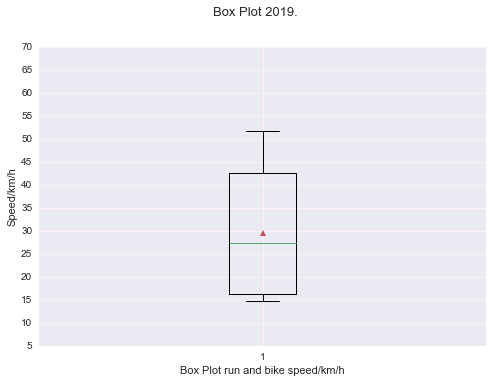

In [83]:
fig, ax = plt.subplots()
fig.suptitle('Box Plot 2019.', fontsize=13)

ax.boxplot(sort_speed19, showmeans=True )

ax.set_yticks(np.arange(5,75,5))
ax.set_ylabel('Speed/km/h')
ax.set_xlabel('Box Plot run and bike speed/km/h')

style.use('seaborn')
plt.grid(True, color ='lavenderblush' )
plt.show()

C)Standardization

In [84]:
sort_ts19.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C
15,Run,14.7,29.4
16,Run,14.8,30.0
17,Run,15.3,59.4
18,Run,15.5,60.0
19,Run,15.6,88.8


In [85]:
sort_ts19['z_actual_speed19'] = (sort_ts19['Speed_19/km/h'] - 29.540000)/13.496401
sort_ts19.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C,z_actual_speed19
15,Run,14.7,29.4,-1.099552
16,Run,14.8,30.0,-1.092143
17,Run,15.3,59.4,-1.055096
18,Run,15.5,60.0,-1.040277
19,Run,15.6,88.8,-1.032868


In [86]:
sortdf2 = sort_ts19.sort_values('Temperature_19/°C', ascending=True)
sortdf2.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C,z_actual_speed19
11,Bike,45.6,25.0,1.189947
8,Bike,43.5,25.0,1.034350
7,Bike,42.7,25.0,0.975075
2,Bike,37.0,25.0,0.552740
0,Bike,34.9,25.0,0.397143


In [87]:
sortdf2['z_actual_temp19']= (sortdf2['Temperature_19/°C'] - 36.590000)/20.022132
sortdf2.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C,z_actual_speed19,z_actual_temp19
11,Bike,45.6,25.0,1.189947,-0.578859
8,Bike,43.5,25.0,1.034350,-0.578859
7,Bike,42.7,25.0,0.975075,-0.578859
2,Bike,37.0,25.0,0.552740,-0.578859
0,Bike,34.9,25.0,0.397143,-0.578859


In [88]:
sort19= sortdf2.sort_values('z_actual_temp19', ascending=True)
sort19.head()

,Segment_name_19,Speed_19/km/h,Temperature_19/°C,z_actual_speed19,z_actual_temp19
11,Bike,45.6,25.0,1.189947,-0.578859
8,Bike,43.5,25.0,1.034350,-0.578859
7,Bike,42.7,25.0,0.975075,-0.578859
2,Bike,37.0,25.0,0.552740,-0.578859
0,Bike,34.9,25.0,0.397143,-0.578859


In [89]:
sort_zat19 = sort19['z_actual_temp19']
sort_zat19.head()

11   -0.578859
8    -0.578859
7    -0.578859
2    -0.578859
0    -0.578859
Name: z_actual_temp19, dtype: float64

In [90]:
sort_zas19 = sort19['z_actual_speed19']
sort_zas19.head()

11    1.189947
8     1.034350
7     0.975075
2     0.552740
0     0.397143
Name: z_actual_speed19, dtype: float64

In [91]:
sort_zas191 = sort19.sort_values(by=['z_actual_temp19'])
sort_zas192= sort_zas191['z_actual_speed19']
sort_zas192.head()

11    1.189947
8     1.034350
7     0.975075
2     0.552740
0     0.397143
Name: z_actual_speed19, dtype: float64

D)Scatter Plot

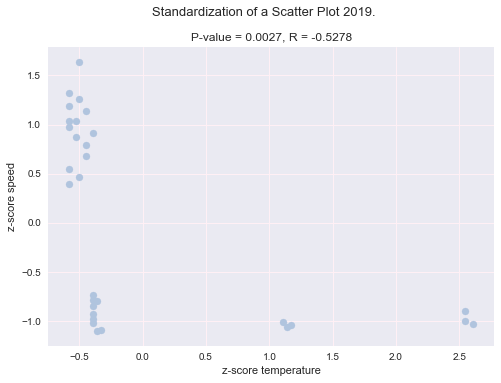

In [92]:
#(zx, zy)= (z_actual_temp,z_actual_speed)
x19 = sort_zat19
y19 = sort_zas192
fig, ax = plt.subplots()
fig.suptitle('Standardization of a Scatter Plot 2019.', fontsize=13)
ax.scatter(x19, y19, color= 'lightsteelblue')


ax.set(xlabel='z-score temperature', ylabel='z-score speed')
ax.set_title('P-value = 0.0027, R = -0.5278')
plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')

In [93]:
r_ts19= stats.pearsonr(sort_zat19,sort_zas192)
r_ts19

(-0.5278681344399982, 0.0027174826640510093)

E) Performing Linear Regression on standardized scores

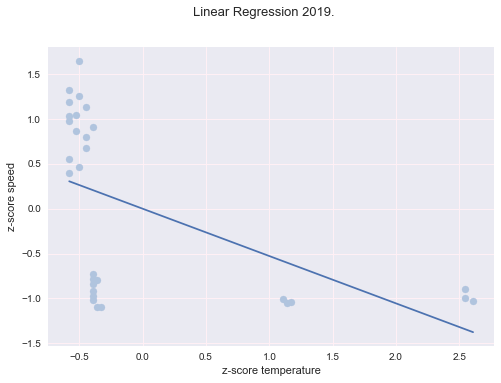

In [94]:
x190 = sort_zat19.values.reshape(-1,1)
y190 = sort_zas192.values.reshape(-1,1)
lr190 = LinearRegression()
lr190.fit(x190, y190)
y190_pred = lr190.predict(x190)
    
fig, ax = plt.subplots()
fig.suptitle('Linear Regression 2019.', fontsize=13)
ax.scatter(x190, y190, color= 'lightsteelblue')
ax.plot(x190, (y190_pred ))

ax.set(xlabel='z-score temperature', ylabel='z-score speed')

plt.grid(True, color ='lavenderblush' )
plt.show()
style.use('seaborn')

F)Identifying the outliers

In [95]:
x191 = sort_zat19.values.reshape(-1,1)
y191 = sort_zas192.values.reshape(-1,1)
x191[5]= 10
y191[5]= 8
#make fit:
regression191 = smapi.ols("data ~ x191", data=dict(data=y191, x=x191)).fit()
regression191.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     15.42
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           0.000512
Time:                        17:55:41   Log-Likelihood:                -52.428
No. Observations:                  30   AIC:                             108.9
Df Residuals:                      28   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0444      0.266      0.167      0.869      -0.501       0.590
x191           0.5051      0.129      3.926      0.001       0.242       0.769
==============================================================================
Omnibus:                        2.802   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.346
Skew:                          -0.063   Prob(JB):                        0.510
Kurtosis:                       1.970   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
test191 = regression191.outlier_test(method='bonf', alpha=0.05)
test191

,student_resid,unadj_p,bonf(p)
0,1.021563,3.160545e-01,1.000000
1,0.907433,3.722058e-01,1.000000
2,0.864297,3.950388e-01,1.000000
3,0.561413,5.791465e-01,1.000000
4,0.451388,6.553146e-01,1.000000
5,7.197375,9.682141e-08,0.000003
6,0.892231,3.801525e-01,1.000000
7,0.768892,4.486314e-01,1.000000
8,1.040364,3.073977e-01,1.000000
9,0.469673,6.423597e-01,1.000000


In [97]:
outliers191 = ((x191[i], y191[i]) for i, t in enumerate(test191['bonf(p)']) if t<0.05)
print('Outliers: ', list(outliers191))

Outliers:  [(array([10.]), array([8.]))]


In [98]:
test191[test191['bonf(p)']<0.05]

,student_resid,unadj_p,bonf(p)
5,7.197375,9.682141e-08,0.000003


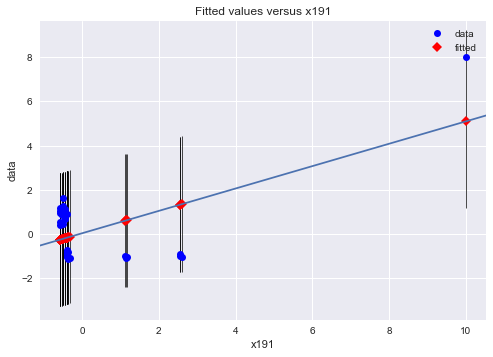

In [99]:
figure191 = smgraph.regressionplots.plot_fit(regression191, 1)
line191 = smgraph.regressionplots.abline_plot(model_results=regression191, ax=figure191.axes[0])


Literature:

1. https://www.endurance-data.com/en/result/451/4-jan-frodeno/
2. https://www.endurance-data.com/en/result/7/2-jan-frodeno/
3. https://hr.wikipedia.org/wiki/Ironman_triatlon
4. https://en.wikipedia.org/wiki/Jan_Frodeno
5. https://www.wunderground.com/history/daily/us/hi/kailua/PHKO/date/2015-10-10
6. https://www.wunderground.com/history/daily/us/hi/kailua/PHKO/date/2019-10-12